# PROJECT 5: Machine Learning

# CONSTRUCTION COSTS IN THE NETHERLANDS

## Study of the costs of different types of buildings in the Netherlands between years 2015 and 2019. 

## It includes an analysis of construction stage related costs for different types of buildings, and the regions of the NL that has the higest construction assocaited costs that people spent.

Data Source: https://opendata.cbs.nl/

In [16]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_1samp

import chart_studio.plotly as py
import cufflinks as cf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats
import statsmodels.api as sm

cf.go_offline()

## Total costs of all buildings in NL from 2015 - 2019

In [17]:
bldg_start = pd.read_excel('../data/costs/costs_buildings started.xlsx')
bldg_start.set_index("Periods", inplace = True) 

import plotly.express as px
fig = px.scatter(bldg_start, x=bldg_start.index, y=bldg_start['Total buildings_mln euro'])
fig.show()

#### From the past 5 years, 2018 had the highest peak in new buildings construction costs. About 5500 million euros were spent in NL on construction.

# Analysis of Costs in the different regions of the NL (North, South, East and West) for Housing and Education sectors.

### Total "Dwelling" Costs for all the regions of Netherlands

In [18]:
noord_housing = pd.read_excel('../data/regions/noord_nederland_housing_costs.xlsx')
noord_housing.rename(columns = {'Orders received by contractors_mln euro':'Noord'}, inplace = True)

oost_housing = pd.read_excel('../data/regions/oost_nederland_housing_costs.xlsx')
oost_housing.rename(columns = {'Orders received by contractors_mln euro':'Oost'}, inplace = True)

west_housing = pd.read_excel('../data/regions/west_nederland_housing_costs.xlsx')
west_housing.rename(columns = {'Orders received by contractors_mln euro':'West'}, inplace = True)


zuid_housing = pd.read_excel('../data/regions/zuid_nederland_housing_costs.xlsx')
zuid_housing.rename(columns = {'Orders received by contractors_mln euro':'Zuid'}, inplace = True)


# Orders received by contractors_mln euro for all the regions

combined = pd.concat([noord_housing['Noord'],oost_housing['Oost'],west_housing['West'],zuid_housing['Zuid']], axis=1)
                                  
combined_orders_cost = combined.set_index(noord_housing["Periods"])                                 
combined_orders_cost.head()

,Noord,Oost,West,Zuid
Periods,,,,
2015 1st quarter,152,506,1051,437
2015 2nd quarter,109,341,992,403
2015 3rd quarter,95,273,716,228
2015 4th quarter,89,318,659,299
2016 1st quarter,97,327,663,311


### Total "Education" Costs for all the regions of Netherlands

In [19]:
noord_education = pd.read_excel('../data/regions/noord_nederland_education_costs.xlsx')
noord_education.rename(columns = {'Orders received by contractors_mln euro':'Noord'}, inplace = True)

oost_education = pd.read_excel('../data/regions/oost_nederland_education_costs.xlsx')
oost_education.rename(columns = {'Orders received by contractors_mln euro':'Oost'}, inplace = True)

west_education = pd.read_excel('../data/regions/west_nederland_education_costs.xlsx')
west_education.rename(columns = {'Orders received by contractors_mln euro':'West'}, inplace = True)


zuid_education = pd.read_excel('../data/regions/zuid_nederland_education_costs.xlsx')
zuid_education.rename(columns = {'Orders received by contractors_mln euro':'Zuid'}, inplace = True)


# Orders received by contractors_mln euro for all the regions

combined = pd.concat([noord_education['Noord'],oost_education['Oost'],west_education['West'],zuid_education['Zuid']], axis=1)
                                  
combined_education_cost = combined.set_index(noord_education["Periods"])                                 
combined_education_cost.head(50)

,Noord,Oost,West,Zuid
Periods,,,,
2015 1st quarter,23,34,51,3
2015 2nd quarter,12,33,47,15
2015 3rd quarter,9,9,18,22
2015 4th quarter,2,16,68,16
2016 1st quarter,2,4,46,17
2016 2nd quarter,2,6,13,32
2016 3rd quarter,0,13,49,24
2016 4th quarter,0,2,6,16
2017 1st quarter,13,24,28,7


# Regression Analysis

#### I would like to assume that the "Dwelling" orders received by contractors and the number of "Dwelling" where the construction started are correlated. I would like to check if there is linear or a non linear regression between the variables.

In [20]:
# "Dwelling" costs for all the four regions of NL can be calculated by combining the values of all the 4 regions.

noord_housing = pd.read_excel('../data/regions/noord_nederland_housing_costs.xlsx')
oost_housing = pd.read_excel('../data/regions/oost_nederland_housing_costs.xlsx')
west_housing = pd.read_excel('../data/regions/west_nederland_housing_costs.xlsx')
zuid_housing = pd.read_excel('../data/regions/zuid_nederland_housing_costs.xlsx')



### There are multiple columns in the dataframe that provided the million of euros spent and the number of buildings constructed that are in different stages.

So, I would like to see how they are all correlated.

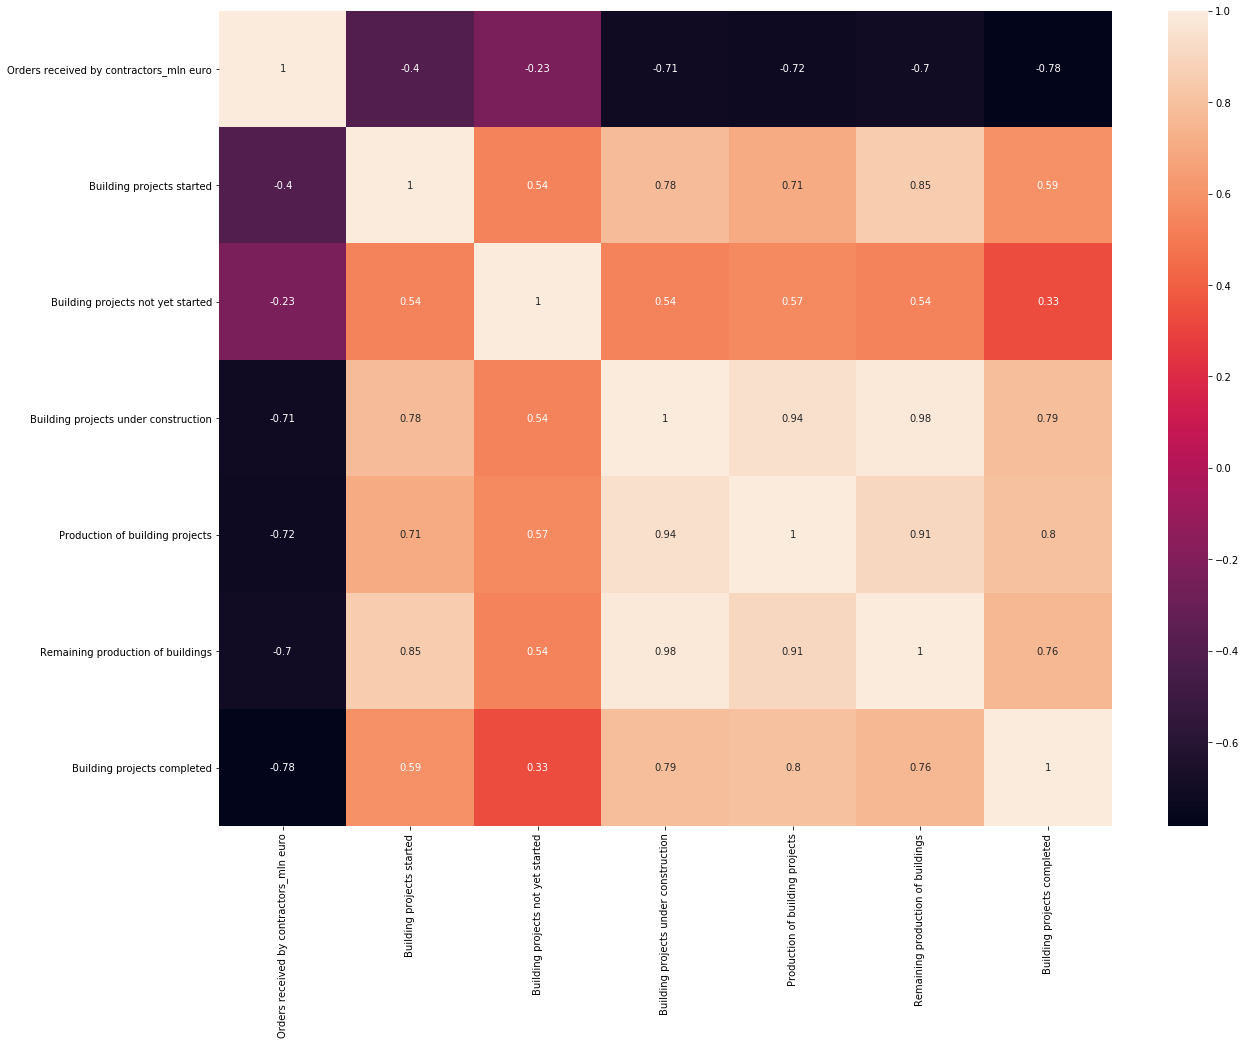

In [21]:
corr = noord_housing.corr()

# Heatmap

plt.figure(figsize=(20,15))

sns.heatmap(corr, annot=True)

There is a positive correlation between "Production of building projects" and "Building projects under construction". This makes complete sense.

There is also a positive correlation between "Building projects started" and "Remaining production of buildings". I think this correlation says that there is a continuous demand for buildings and the construction is a continuing. Since no information is provided on what each column means in the dataset its hard to definitely say what it means.

The correlation that I find interesting is that there is a strong positive correaltion between "Orders received by contractors_mln euro" and "Building projects not yet started". This probably says that there is a backlog in the construction activities.

#### There is a positive correaltion between the two chosen variables.


In [22]:
noord_housing.isna().sum()

Periods                                    0
Orders received by contractors_mln euro    0
Building projects started                  0
Building projects not yet started          0
Building projects under construction       0
Production of building projects            0
Remaining production of buildings          0
Building projects completed                0
dtype: int64

In [23]:
# Orders received by contractors_mln euro for all the regions

reg_combined = noord_housing + oost_housing + west_housing + zuid_housing       

# Checking the correlation between "Orders received by contractors_mln euros" and "Building projects started"

reg_combined[["Orders received by contractors_mln euro", "Building projects started"]].corr()

,Orders received by contractors_mln euro,Building projects started
Orders received by contractors_mln euro,1.00000,-0.41343
Building projects started,-0.41343,1.00000


### Building a regression model for the data from two varaibles "Orders received by contractors_mln euros" and "Building projects started"

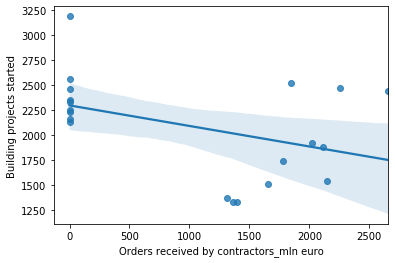

In [24]:
sns.regplot(x="Orders received by contractors_mln euro", y="Building projects started", data=reg_combined)

In [25]:
# I am using linear regression as there is a negative correlation between the data we want to analyze
# In regression analysis, the dependent variable is denoted "Y" and the independent variables are denoted by "X".
# Linear regression is also known as ordinary least squares (OLS) and linear least squares

from scipy import stats
import statsmodels.api as sm

# Adding a Constant
X = reg_combined['Orders received by contractors_mln euro']
Y = reg_combined['Building projects started']

x = sm.add_constant(X)

 
results = sm.OLS(Y,x).fit()
 
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Building projects started   R-squared:                       0.171
Model:                                   OLS   Adj. R-squared:                  0.125
Method:                        Least Squares   F-statistic:                     3.711
Date:                       Sat, 13 Jun 2020   Prob (F-statistic):             0.0700
Time:                               14:10:21   Log-Likelihood:                -150.24
No. Observations:                         20   AIC:                             304.5
Df Residuals:                             18   BIC:                             306.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2295.4756    151.547     15.147      0.000    1977.087    2613.865
Orders received by contractors_mln euro    -0.2060      0.107     -1.926      0.070      -0.431       0.019
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.544
Skew:                           0.279   Prob(JB):                        0.762
Kurtosis:                       2.416   Cond. No.                     2.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""




#### From the above summary table, we see that the p-value is 0.007 and we can say that the variables are statistiacally significant.


#### R-SQUARED:
The R-squared value is a widely-used measure that describes how powerful a regression is. 
The R-squared measures how much of the total variability is explained by our model.
Here the R-squared value is 0.567. R-squared of 1 would mean our model explains the entire variability of the data.
What we usually observe are values ranging from 0.2 to 0.9. The value we got here fall under that category and we can conclude that the regression is strong.





### Therefore there is a strong correlation between Housing orders received by contractors, and the number of Housing projects where the construction started 


### Plotting the regression model on the scatter plot.

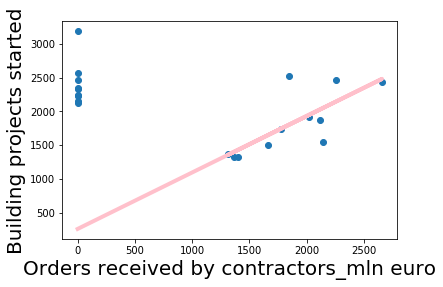

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
 
# From the above summary table, the coefficient = 0.8371 which is "Orders received by contractors_mln euro", 
# and incercept is the constant is 256.4860    

yhat = 0.8371*X + 256.4860

 
fig = plt.plot(X,yhat, lw=4, c='pink', label = 'regression line')
 
plt.xlabel('Orders received by contractors_mln euro', fontsize = 20)
 
plt.ylabel('Building projects started', fontsize = 20)
 
plt.show()

#### From the above scatter plot, it is clear that the "Orders received by contractors_mln euro" is a good predictor of "Building projects started". 

#### The pink line in the plot above is the regression line – the predicted variables based on the data.

# Total Building Costs for all types of buildings

In [27]:
total_cost = pd.read_excel('../data/Total Building Costs.xlsx')
total_cost.set_index("Periods", inplace = True) 
total_cost.head()

,Orders received by contractors,Building projects started,Production of building projects,Building projects completed
Periods,,,,
2015 January,929,1083,968,673
2015 February,1415,1070,957,908
2015 March,1397,942,1076,1086
2015 April,1380,1356,951,937
2015 May,1047,1563,893,810


In [28]:
total_cost.isna().sum()

Orders received by contractors     0
Building projects started          0
Production of building projects    0
Building projects completed        0
dtype: int64

In [29]:
total_cost.dtypes

Orders received by contractors     int64
Building projects started          int64
Production of building projects    int64
Building projects completed        int64
dtype: object

# Performing Supervised Learning on the building dataframe

# Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [106]:
total_cost.columns

Index(['Orders received by contractors', 'Building projects started',
       'Production of building projects', 'Building projects completed',
       'labels'],
      dtype='object')

In [30]:

from sklearn.model_selection import train_test_split

y = total_cost['Building projects started']
X = total_cost.drop('Building projects started', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Here I will evaluate the model and also try two different models to compare my results

## I will use Linear Regression and K-nearest Neighbours

### 1. Linear Regression



The first model we will use in this lab is **Linear Regression**. 

In [52]:

# TRAIN THE  MODEL 


from sklearn.linear_model import LinearRegression 
model = LinearRegression()

Next, fit the model to my training data. 

In [53]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate the model

Compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

In [54]:
# TEST THE  MODEL 

y_pred = model.predict(X_train)
pd.DataFrame({'test':y_train, 'predicted':y_pred})

,test,predicted
Periods,,
2016 August,1156,1081.402316
2016 September,1131,1336.152656
2016 April,955,1259.301260
2015 December,856,1177.035715
2019 November*,1429,1464.936383
2019 January,1634,1333.739817
2019 May*,1462,1339.772767
2016 January,988,1177.772112
2015 March,942,1304.999860


In [55]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.16512798461455613

In [ ]:
#Paolo: indeed r2 score is quite low

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [57]:
y_test_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_test_pred})

,test,predicted
Periods,,
2018 February,1294,1313.796243
2017 November,1533,1411.487232
2016 June,1042,1288.675071
2015 April,1356,1268.666392
2020 March*,1148,1458.393916
2018 March,1331,1371.724287
2018 September,1554,1397.411391
2019 February,1376,1336.704355
2019 April*,1430,1415.839431


In [69]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

-0.19259068437761773

In [60]:
#Paolo: negative r2_score! It means that this model is really not appropriate for this prediction

**The r squared score for the training data is 0.2578 and the test data is -1.01402.**

**The r2 score for the test data is a negative value which shows that model can be arbitrarily worse.**

### 2. K-Nearest Neighbors

### Our second algorithm is K-Nearest Neighbors. 

We will fit a model using the training data and then test the performance of the model using the testing data. We will start by loading `KNeighborsClassifier` from scikit-learn and then initialize and fit the model. We'll start off with a model where k=3.

In [84]:
# TRAIN THE MODEL 

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

**Accuracy Score**

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html

In [85]:
# TEST THE MODEL

y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_test_pred})

,test,predicted
Periods,,
2018 February,1294,1313.796243
2017 November,1533,1411.487232
2016 June,1042,1288.675071
2015 April,1356,1268.666392
2020 March*,1148,1458.393916
2018 March,1331,1371.724287
2018 September,1554,1397.411391
2019 February,1376,1336.704355
2019 April*,1430,1415.839431


In [109]:
accuracy_score(y_test, y_pred)

0.0

In [ ]:
#Paolo: watch out, accuracy score is for classification, here you have a regression problem. So it is normal
# that accuracy score is 0

**Confusion matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

# Unsupervised Learning


# Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `total_cost` in a new column called `total_cost['labels']`. Then you'll see the cluster results of the original data.

In [90]:
# Your code here:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# n_clusters: The number of clusters to form as well as the number of centroids to generate.
# By default n_clusters=8

from sklearn.cluster import KMeans

total_cost_kmeans = KMeans().fit(total_cost)
total_cost_kmeans.labels_

array([2, 1, 5, 1, 4, 5, 2, 6, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 5, 6, 5, 5,
       5, 1, 4, 1, 3, 1, 3, 5, 1, 4, 3, 0, 3, 1, 7, 1, 3, 3, 3, 0, 0, 4,
       3, 0, 7, 1, 3, 3, 0, 3, 3, 3, 0, 4, 7, 0, 0, 1, 7, 3, 0])

In [91]:
total_cost['labels'] = total_cost_kmeans.labels_

total_cost

,Orders received by contractors,Building projects started,Production of building projects,Building projects completed,labels
Periods,,,,,
2015 January,929,1083,968,673,2
2015 February,1415,1070,957,908,1
2015 March,1397,942,1076,1086,5
2015 April,1380,1356,951,937,1
2015 May,1047,1563,893,810,4
...,...,...,...,...,...
2019 November*,1661,1429,1504,1556,0
2019 December*,1551,1556,1091,971,1
2020 January*,1124,1647,1558,1655,7


Count the values in `labels`.

In [92]:
# Your code here:

total_cost['labels'].value_counts() 

3    14
2    10
1    10
5     9
0     9
4     5
7     4
6     2
Name: labels, dtype: int64

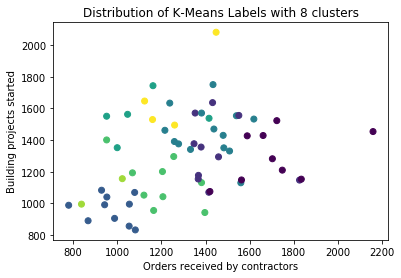

In [94]:
# K-Means Labels Scatter Plot
plt.scatter(x=total_cost['Orders received by contractors'], y=total_cost['Building projects started'], c=total_cost["labels"])
plt.title('Distribution of K-Means Labels with 8 clusters')
plt.xlabel('Orders received by contractors')
plt.ylabel('Building projects started')
plt.show()


### I would like to reduce the number of clusters to 2 to see the change from the default 8 clusters in the above

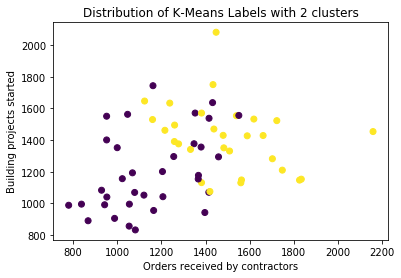

In [99]:
# Your code here

from sklearn.cluster import KMeans

# KMeans for n_clusters=2
total_cost_kmeans = KMeans(n_clusters=2).fit(total_cost)
total_cost['labels'] = total_cost_kmeans.labels_

plt.scatter(x=total_cost['Orders received by contractors'], y=total_cost['Building projects started'], c=total_cost["labels"])
plt.title('Distribution of K-Means Labels with 2 clusters')
plt.xlabel('Orders received by contractors')
plt.ylabel('Building projects started')
plt.show()

In [45]:
# By reducing the number of clusters I can clearly see the difference.

# CONCLUSIONS

## Research Questions:

Q1: Are the “Housing" orders received by contractors and the number of “Housing" projects where the construction started correlated?



## Overall Analysis:

Yes, the "Orders received by contractors_mln euro" is  a good predictor of "Building projects started". 


## Comments Paolo

Sreelatha, I think it was a useful exercise to extend your previous project with the machine learning part. 
You showed that you could use Supervised and Unsupervised technique and also that you understand the difference between train and test performance. A couple of suggestions
- The accuracy score is used for classification problems, while here you have a regression problem, so it is normal that it is zero. For regression problem you could use the r2 score or different type of errors like mean absolute error (MAE) or mean squared error (MSE) 
- In the conclusions you wrote that "Orders received by contractors_mln euro" is a good predictor of "Building projects started"". But all the scores show low performance, so on the basis of what you conclude that?
- Along with the scores (r_2, MSE, MAE etc) it helps to plot for example y_pred - y_true to have a direct visual on what is going on. The plot usually is richer in information than the single number  you get out of the score
